In [1]:
import sys
sys.path.append('..')
sys.path.append('../src')
sys.path.append('../data')

from src.ablate_heads import Ablate, AblateMultiLen, OVCircuit
from src.dataset import MyDataset
from src.model import WrapHookedTransformer
from src.myplot import plot_heatmaps, barplot_head
import torch
torch.set_grad_enabled(False)
%load_ext autoreload
%autoreload 2

In [2]:
model = WrapHookedTransformer.from_pretrained("gpt2", device="cuda", refactor_factored_attn_matrices=True)


dataset_ = MyDataset("../data/counterfact_small_15_final.json", model)
print(dataset.get_lengths())
ablate_multi = AblateMultiLen(dataset, model, 40)

Using pad_token, but it is not set yet.


Loaded pretrained model gpt2 into HookedTransformer
Dataset loaded from ../data/counterfact_small_15_final.json
Number of samples: 1519
[19, 21, 17]


In [22]:
dataset_ = MyDataset("../data/counterfact_small_15_final.json", model)
dataset_.set_len(21,model)
print(len(dataset_))

Dataset loaded from ../data/counterfact_small_15_final.json
Number of samples: 1519
698


## Ablate the heads

In [ ]:
examples_mem, examples_cp = ablate_multi.ablate_multi_len(filter_outliers=True, save_filtered=True)


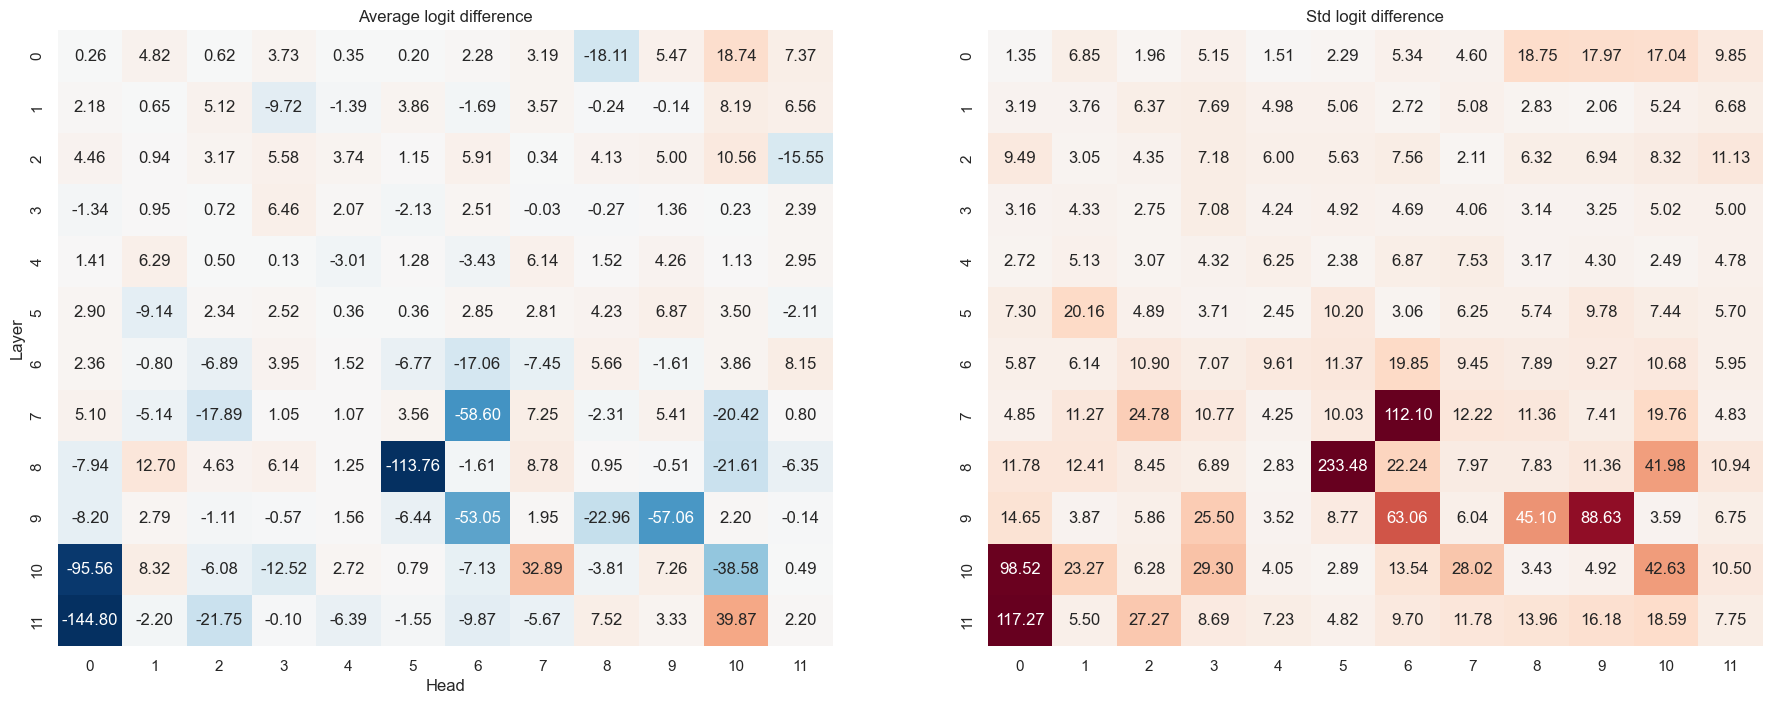

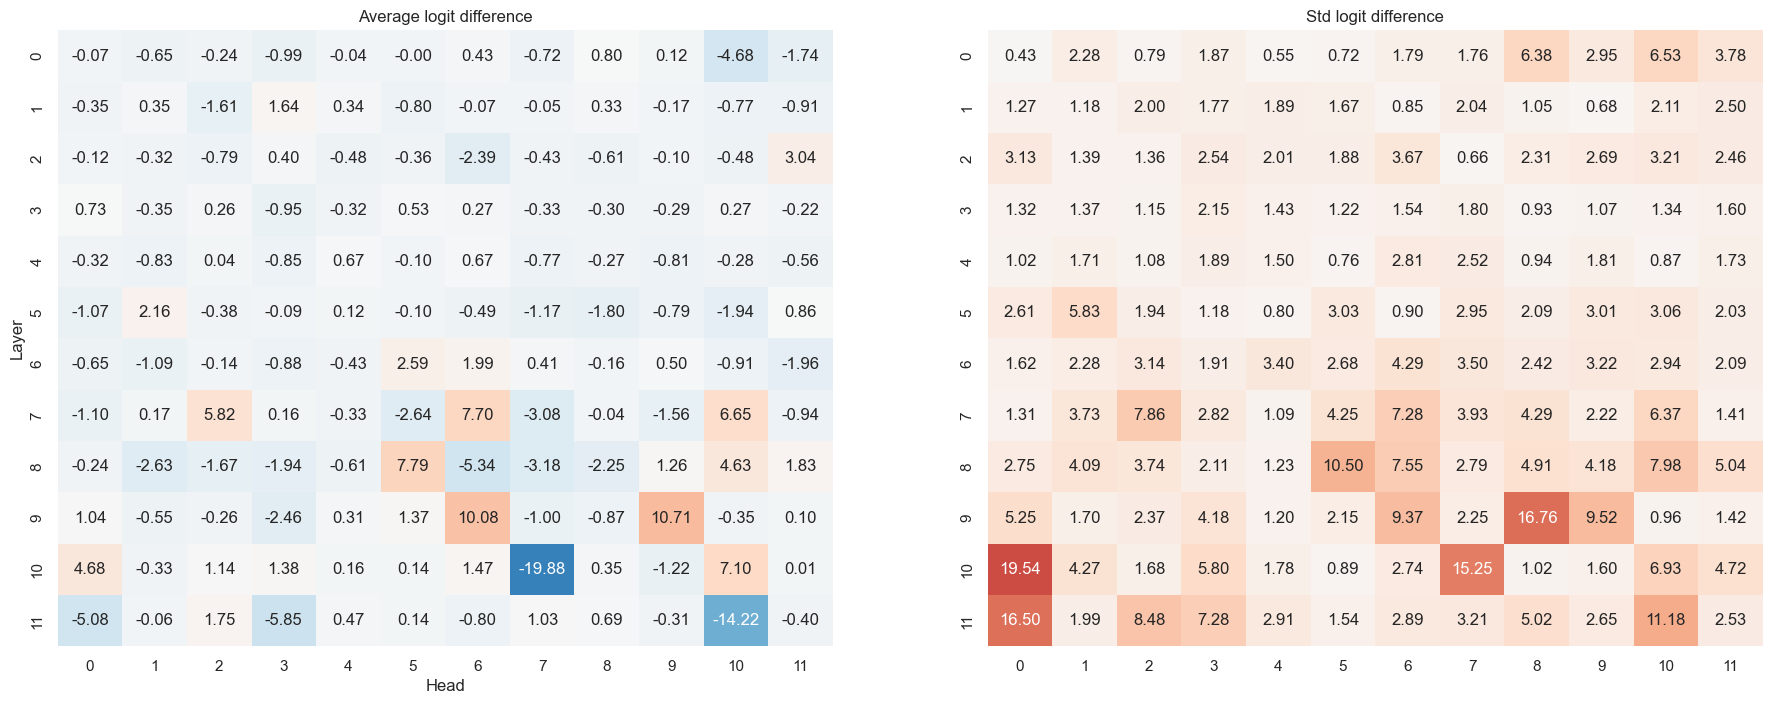

In [10]:
plot_heatmaps(examples_cp.mean(-1), examples_cp.std(-1), "Average logit difference", 100, save=False)
plot_heatmaps(examples_mem.mean(-1), examples_mem.std(-1), "Average logit difference", 30, save=False)

## Study the OV circuit for the heads and the residual stream

In [23]:
dataset = ablate_multi.ablate.dataset

In [24]:
ovcircuit = OVCircuit(model, dataset, 40)

OV circuit at all heads: 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


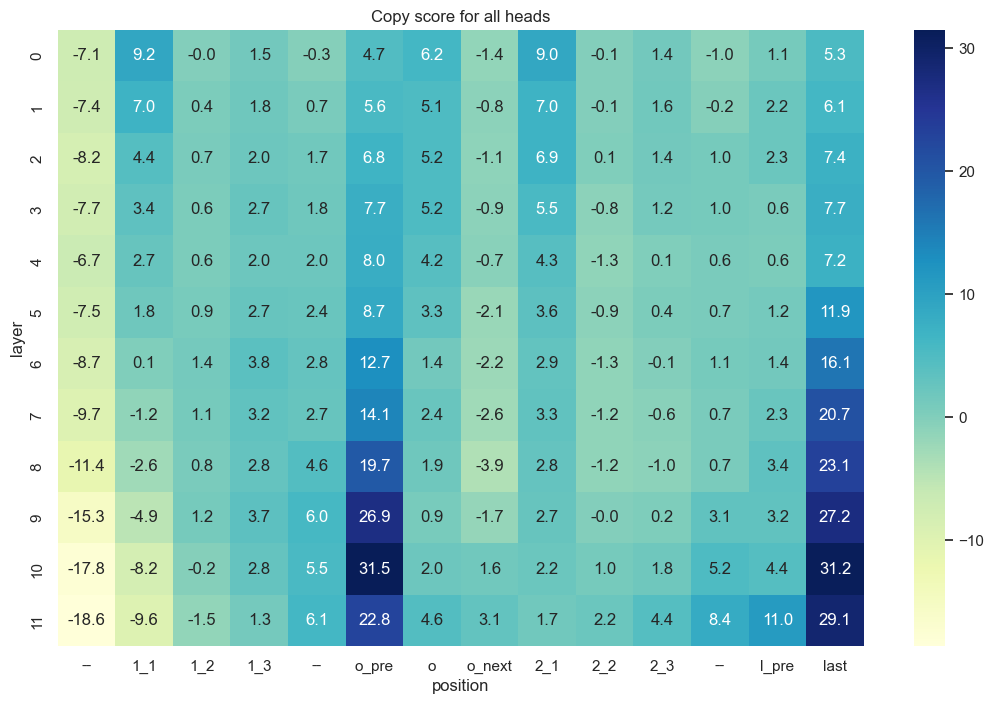

In [25]:
score = ovcircuit.residual_stram_track_target_all_len( target="mem" , plot=True)

OV circuit at all heads: 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


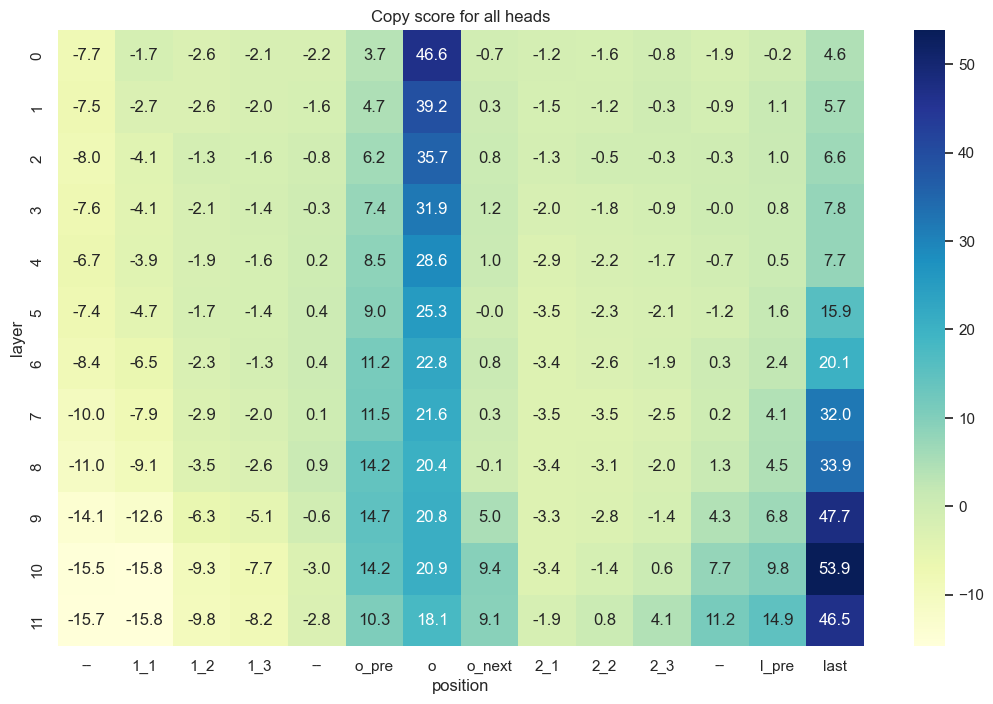

In [26]:
score = ovcircuit.residual_stram_track_target_all_len(target="copy" , plot=True)

OV circuit at all heads: 100%|██████████| 7/7 [00:16<00:00,  2.29s/it]


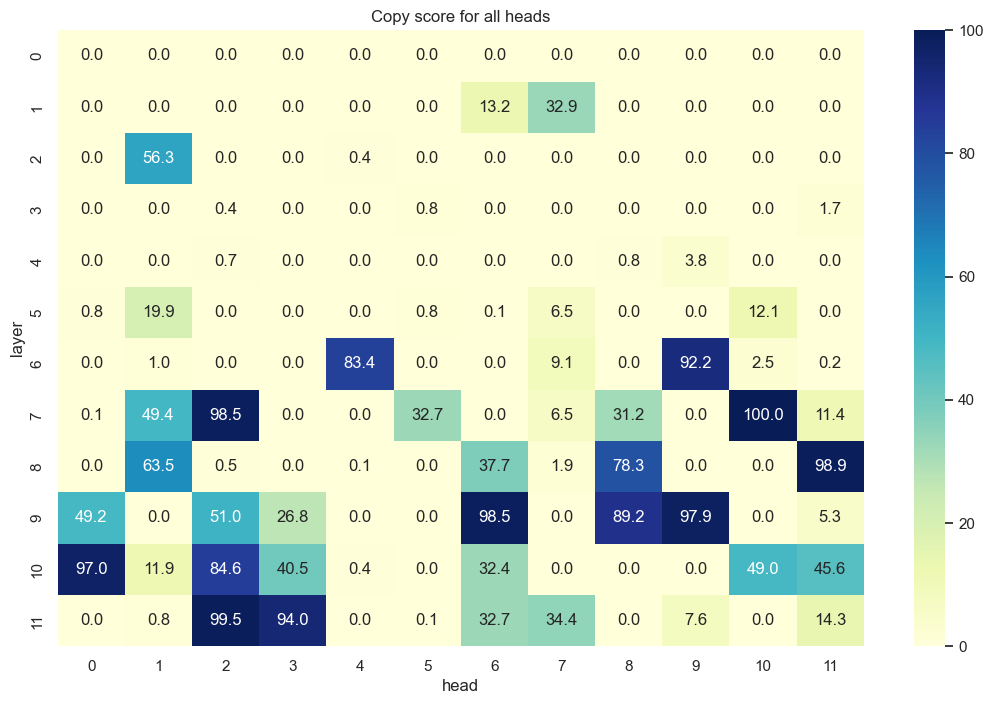

In [27]:
ovcircuit.compute_copy_score_all_heads(resid_layer_input=0, resid_pos="definition",  target="copy", plot=True)

OV circuit at all heads: 100%|██████████| 7/7 [00:14<00:00,  2.05s/it]


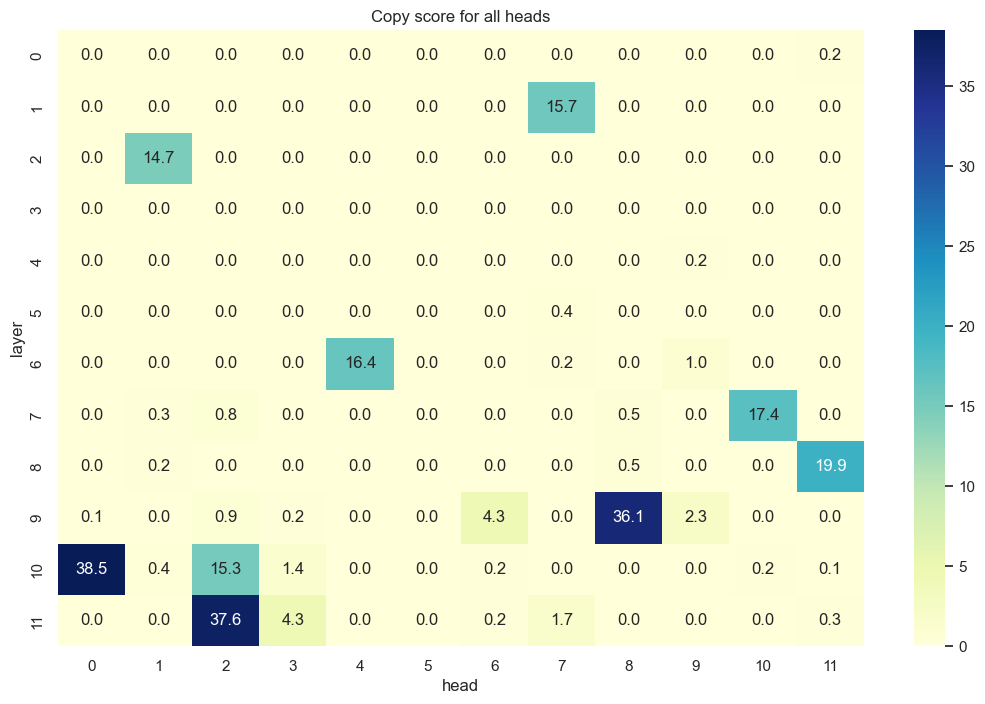

In [28]:
ovcircuit.compute_copy_score_all_heads(resid_layer_input=0, resid_pos="2_1_subject",  target="mem", plot=True)